In [2]:
import pandas as pd
import os
import numpy as np

fnames = os.listdir("../data/acs_tables/")
join_cols = ["GEO_ID","NAME","state","county","tract","block group"]

In [3]:
df = None

for file in fnames:
    table_df = pd.read_json(f"../data/acs_tables/{file}")
    table_df.columns = table_df.iloc[0]
    table_df = table_df[1:]

    if df is not None:
        df = df.merge(table_df, on=join_cols)
    else:
        df = table_df

In [4]:
data_cols = list(set(df.columns).symmetric_difference(set(join_cols)))
types = dict(zip(data_cols,["int32"]*len(data_cols)))
df = df.astype(types, errors='ignore')

In [5]:
new_df = df[join_cols].copy()
new_df["tot_pop_acs"] = df["B01001_001E"]
new_df["tot_hh_acs"]  = df["B19058_001E"] 
new_df["tot_vap_acs"] = df["B01001_001E"] - df["B01001_003E"] - df["B01001_004E"] - df["B01001_005E"] - df["B01001_006E"] - df["B01001_027E"] - df["B01001_028E"] - df["B01001_029E"] - df["B01001_030E"]
new_df["civ_vap_acs"] = df["B21001_001E"] 
new_df["gt_25_pop"]   = df["B15002_001E"]
new_df["gt_19_uninst_civs"]    = df["B27010_001E"] - df["B27010_002E"] 
new_df["gt_16_working_pop"]    = df["B08301_001E"] 
new_df["gt_15_pop"]            = df["B12001_001E"]

new_df["uninsured_vap"] = df["B27010_033E"] + df["B27010_050E"] + df["B27010_066E"]

new_df["female_vap"] = df["B01001_026E"] - (df["B01001_027E"] + df["B01001_028E"] + df["B01001_029E"] + df["B01001_030E"]) 

new_df["veteran_vap"] = df["B21001_002E"] 

new_df["receiving_public_assistance_hh"] = df["B19058_002E"] 

new_df["married_pop"] = df["B12001_004E"] + df["B12001_013E"] 
new_df["divorced_pop"] = df["B12001_010E"] + df["B12001_019E"] 

new_df["eng_only_hh"] = df["C16002_002E"] 
new_df["esp_lim_hh"] = df["C16002_004E"] 
new_df["esp_not_lim_hh"] = df["C16002_005E"] 
new_df["other_lang_lim_hh"] = df["C16002_007E"] + df["C16002_010E"] + df["C16002_013E"] 
new_df["other_lang_not_lim_hh"] = df["C16002_008E"] + df["C16002_011E"] + df["C16002_014E"] 

new_df["cvap_acs"] = df["B29001_001E"] 

new_df["non_computer_hh"] = df["B28003_006E"] 
new_df["internet_hh"] = df["B28003_003E"] + df["B28003_004E"] 

new_df["lt_highschool_pop"] = df["B15002_003E"] + df["B15002_005E"] + df["B15002_004E"] + df["B15002_006E"] + df["B15002_007E"] + df["B15002_008E"] + df["B15002_009E"] + df["B15002_010E"] + df["B15002_020E"] + df["B15002_021E"] + df["B15002_022E"] + df["B15002_023E"] + df["B15002_024E"] + df["B15002_025E"] + df["B15002_026E"] + df["B15002_027E"]
new_df["highschool_pop"] = df["B15002_011E"] + df["B15002_028E"]
new_df["some_college_pop"]= df["B15002_012E"] + df["B15002_013E"] + df["B15002_029E"] + df["B15002_030E"]
new_df["associates_pop"] = df["B15002_014E"] + df["B15002_031E"] 
new_df["bachelors_pop"] = df["B15002_015E"] + df["B15002_032E"] 
new_df["grad_and_professional_pop"] = df["B15002_016E"] + df["B15002_017E"] + df["B15002_018E"] + df["B15002_033E"] + df["B15002_034E"] + df["B15002_035E"]

new_df["drives_alone_work_pop"] = df["B08301_003E"] 
new_df["public_transit_work_pop"] = df["B08301_010E"] 

new_df["walk_to_work_pop"] = df["B08301_019E"] 
new_df["bike_to_work_pop"] = df["B08301_018E"] 

new_df["family_hh"] = df["B11001_002E"] 
new_df["living_alone_hh"] = df["B11001_008E"] 
new_df["non_family_multi_member_hh"] = df["B11001_009E"] 
new_df["lt_10_min_pop"] = df["B08303_002E"] + df["B08303_003E"] + df["B08301_011E"] 
new_df["10_to_30_min_pop"] = df["B08303_004E"] + df["B08303_005E"] + df["B08303_006E"] + df["B08303_007E"] 
new_df["30_to_60_min_pop"] = df["B08303_008E"] + df["B08303_009E"] + df["B08303_010E"] + df["B08303_011E"] 
new_df["gt_60_min_pop"] = df["B08303_012E"] + df["B08303_013E"]

In [6]:
vap_cols = ['tot_vap_acs',
            'civ_vap_acs',
            'cvap_acs',
            "gt_19_uninst_civs",
            'uninsured_vap',
            'female_vap',
            'veteran_vap',
            'gt_25_pop',
            'gt_16_working_pop',
            'married_pop',
            'divorced_pop',
            'lt_highschool_pop',
            'highschool_pop',
            'some_college_pop',
            'associates_pop',
            'bachelors_pop',
            'grad_and_professional_pop',
            'drives_alone_work_pop',
            'public_transit_work_pop',
            'walk_to_work_pop',
            'bike_to_work_pop',
            'lt_10_min_pop',
            '10_to_30_min_pop',
            '30_to_60_min_pop',
            'gt_60_min_pop']

pop_cols = ['tot_pop_acs',
            'gt_15_pop']

hh_cols  = ['tot_hh_acs',
            'receiving_public_assistance_hh',
            'eng_only_hh',
            'esp_lim_hh',
            'esp_not_lim_hh',
            'other_lang_lim_hh',
            'other_lang_not_lim_hh',
            'non_computer_hh',
            'internet_hh',
            'family_hh',
            'living_alone_hh',
            'non_family_multi_member_hh']

In [7]:
new_df.to_csv("data/acs_dataset_bgs.csv")

In [8]:
import geopandas as gpd
import maup
import matplotlib.pyplot as plt

In [9]:
decennial_blk_df = pd.read_csv("data/10decPL_chicago_blocks_raw.csv")
del decennial_blk_df["Unnamed: 0"]
decennial_blk_df["GEO_ID"] = [id.replace("1000000US", '') for id in decennial_blk_df["GEO_ID"]]

cnty_blk_gdf = gpd.GeoDataFrame.from_file("data/tl_2010_17031_tabblock10/tl_2010_17031_tabblock10.shp").to_crs("EPSG:3435")
cnty_bg_gdf  = gpd.GeoDataFrame.from_file("data/tl_2010_17031_bg10/tl_2010_17031_bg10.shp").to_crs("EPSG:3435")
prcts_gdf    = gpd.GeoDataFrame.from_file("data/precincts_shapefile/PRECINCTS_2012.shp")

/var/folders/53/psvx_ym12wg942h2sxtd91v80000gn/T/ipykernel_26632/132132384.py:1: DtypeWarning: Columns (74,152,300,301,302) have mixed types. Specify dtype option on import or set low_memory=False.
  decennial_blk_df = pd.read_csv("data/10decP3P4H1_chicago_blocks_raw.csv")


In [10]:
clipped_blks_gdf = gpd.clip(cnty_blk_gdf, prcts_gdf)
clipped_bg_gdf   = gpd.clip(cnty_bg_gdf,  prcts_gdf)

In [11]:
desired_df = decennial_blk_df[["GEO_ID"]].copy()
desired_df["tot_pop10"] = decennial_blk_df["P001001"].copy()
desired_df["tot_vap10"] = decennial_blk_df["P003001"].copy()
desired_df["tot_hh10"]  = decennial_blk_df["H001001"].copy()

clipped_blks_gdf = clipped_blks_gdf.merge(desired_df, how="inner", left_on="GEOID10", right_on="GEO_ID")
del clipped_blks_gdf["GEO_ID"]

In [12]:
new_data = pd.read_csv("data/acs_dataset_bgs.csv")
del new_data["Unnamed: 0"]
new_data["GEO_ID"] = [id.replace("1500000US", '') for id in new_data["GEO_ID"]]
enriched_bg_gdf = clipped_bg_gdf.merge(new_data, how="inner", left_on="GEOID10", right_on="GEO_ID")

In [13]:
blk_bg_assignmnt = maup.assign(clipped_blks_gdf, enriched_bg_gdf)

/Users/hazelnb/opt/anaconda3/envs/kmapper_fork/lib/python3.9/site-packages/maup/indexed_geometries.py:16: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  geometry.index = i
/Users/hazelnb/opt/anaconda3/envs/kmapper_fork/lib/python3.9/site-packages/maup/indexed_geometries.py:17: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)
/Users/hazelnb/opt/anaconda3/envs/kmapper_fork/lib/python3.9/site-packages/maup/indexed_geometries.py:17: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)


In [14]:
def safe_div(a, b):
    return np.divide(a, b, out=np.zeros(a.shape, dtype=float), where=(b!=0))

In [15]:
blks = clipped_blks_gdf
bgs  = enriched_bg_gdf

pop_weights = safe_div(blks.tot_pop10, blk_bg_assignmnt.map(blks.tot_pop10.groupby(blk_bg_assignmnt).sum()))
vap_weights = safe_div(blks.tot_vap10, blk_bg_assignmnt.map(blks.tot_vap10.groupby(blk_bg_assignmnt).sum()))
hh_weights  = safe_div(blks.tot_hh10,  blk_bg_assignmnt.map(blks.tot_hh10.groupby(blk_bg_assignmnt).sum()))

In [16]:
prorated_pop_cols = maup.prorate(blk_bg_assignmnt, bgs[pop_cols], pop_weights)
prorated_vap_cols = maup.prorate(blk_bg_assignmnt, bgs[vap_cols], vap_weights)
prorated_hh_cols  = maup.prorate(blk_bg_assignmnt, bgs[hh_cols],  hh_weights)

blks[pop_cols] = prorated_pop_cols
blks[vap_cols] = prorated_vap_cols
blks[hh_cols]  = prorated_hh_cols

In [17]:
blk_prct_assignment = maup.assign(blks, prcts_gdf)

prcts_gdf[pop_cols] = blks[pop_cols].groupby(blk_prct_assignment).sum()
prcts_gdf[vap_cols] = blks[vap_cols].groupby(blk_prct_assignment).sum()
prcts_gdf[hh_cols] = blks[hh_cols].groupby(blk_prct_assignment).sum()

/Users/hazelnb/opt/anaconda3/envs/kmapper_fork/lib/python3.9/site-packages/maup/indexed_geometries.py:17: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)
/Users/hazelnb/opt/anaconda3/envs/kmapper_fork/lib/python3.9/site-packages/maup/indexed_geometries.py:17: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)


In [18]:
chicago_mayoral_data = pd.read_csv("data/enriched_chicago_mayoral.csv")
del chicago_mayoral_data["Unnamed: 0"]
merged_df = chicago_mayoral_data.merge(prcts_gdf, how="inner", left_on=["WARD", "PRECINCT"], right_on=["WARD", "PRECINCT"])
merged_df = merged_df.loc[:,~merged_df.columns.duplicated()].copy()
count_output = pd.DataFrame(merged_df.drop(columns='geometry'))
count_output.to_csv("data/chicago_mayoral_acs_counts.csv")

In [19]:
import re 

norm_mapping = {'uninsured_vap': "gt_19_uninst_civs",
                'female_vap': 'tot_vap_acs',
                'veteran_vap': 'civ_vap_acs',
                'married_pop': 'gt_15_pop',
                'divorced_pop': 'gt_15_pop',
                'lt_highschool_pop': 'gt_25_pop',
                'highschool_pop': 'gt_25_pop',
                'some_college_pop': 'gt_25_pop',
                'associates_pop': 'gt_25_pop',
                'bachelors_pop': 'gt_25_pop',
                'grad_and_professional_pop': 'gt_25_pop',
                'drives_alone_work_pop': 'gt_16_working_pop',
                'public_transit_work_pop': 'gt_16_working_pop',
                'walk_to_work_pop': 'gt_16_working_pop',
                'bike_to_work_pop': 'gt_16_working_pop',
                'lt_10_min_pop': 'gt_16_working_pop',
                '10_to_30_min_pop': 'gt_16_working_pop',
                '30_to_60_min_pop': 'gt_16_working_pop',
                'gt_60_min_pop': 'gt_16_working_pop',
                'receiving_public_assistance_hh': 'tot_hh_acs',
                'eng_only_hh': 'tot_hh_acs',
                'esp_lim_hh': 'tot_hh_acs',
                'esp_not_lim_hh': 'tot_hh_acs',
                'other_lang_lim_hh': 'tot_hh_acs',
                'other_lang_not_lim_hh': 'tot_hh_acs',
                'non_computer_hh': 'tot_hh_acs',
                'internet_hh': 'tot_hh_acs',
                'family_hh': 'tot_hh_acs',
                'living_alone_hh': 'tot_hh_acs',
                'non_family_multi_member_hh': 'tot_hh_acs'}

pct_df = count_output.copy()

for k, v in norm_mapping.items():
    pct_key = re.sub(r'(_vap$|_pop$|_hh$)', '_pct', k)

    pct_df[pct_key] = safe_div(count_output[k], count_output[v])
    del pct_df[k]
  


In [20]:
pct_df.to_csv("data/chicago_mayoral_acs_pct.csv")

In [21]:
pct_gdf = merged_df.copy()

for k, v in norm_mapping.items():
    pct_key = re.sub(r'(_vap$|_pop$|_hh$)', '_pct', k)

    pct_gdf[pct_key] = safe_div(merged_df[k], merged_df[v])
    del pct_gdf[k]

In [22]:
pd.set_option('display.max_columns', 500)
pct_df = pct_df.replace(np.NaN, 0.0)

In [23]:
pct_df.to_csv("data/chicago_mayoral_acs_pct.csv")

<Axes: >

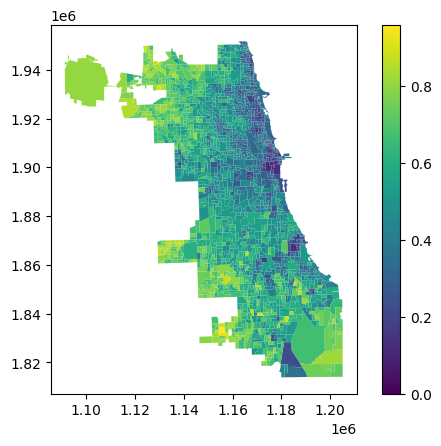

In [27]:
gpd.GeoDataFrame(pct_gdf).plot("drives_alone_work_pct", legend=True)